In [1]:
# Datset source
# https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

In [2]:
# Problem Statement: Predict the american sign language alphabets from images

In [3]:
# Notebook built using the template of following pytorch tutorial
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import os
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

# Pytorch imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader


# to make this notebook's output stable across runs
np.random.seed(2)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
base_dir = '../datasets/ASL_Alphabet/'
train_dir = 'asl_alphabet_train/asl_alphabet_train'
test_dir = 'asl_alphabet_test/asl_alphabet_test'

In [6]:
train_folder_list = glob(os.path.join(base_dir, train_dir) + '/*')

i = 0
images_array = np.zeros((29000, 200, 200, 3), dtype=np.uint8)
images_label_list = []
for letter_folder in train_folder_list:
    image_list = glob(letter_folder + '/*.jpg')
    letter_label = os.path.basename(letter_folder)
    for index, image in enumerate(image_list):
        with Image.open(image) as img:
            img_array = np.asarray(img, dtype=np.uint8)
            images_array[i] = img_array
            images_label_list.append(letter_label)
        i += 1
        if index == 999:
            break
        
print(images_array.shape, len(images_label_list))

(29000, 200, 200, 3) 29000


In [7]:
print(images_label_list[24395])
sample_image = Image.fromarray(images_array[24395].astype(np.uint8))
sample_image.show()

J


In [8]:
for index, letter in enumerate(images_label_list):
    if (index%1000) == 0:
        print(index, letter, type(letter))

0 G <class 'str'>
1000 I <class 'str'>
2000 B <class 'str'>
3000 Z <class 'str'>
4000 W <class 'str'>
5000 C <class 'str'>
6000 L <class 'str'>
7000 M <class 'str'>
8000 F <class 'str'>
9000 Y <class 'str'>
10000 A <class 'str'>
11000 Q <class 'str'>
12000 D <class 'str'>
13000 X <class 'str'>
14000 nothing <class 'str'>
15000 space <class 'str'>
16000 R <class 'str'>
17000 K <class 'str'>
18000 E <class 'str'>
19000 V <class 'str'>
20000 U <class 'str'>
21000 H <class 'str'>
22000 T <class 'str'>
23000 N <class 'str'>
24000 J <class 'str'>
25000 P <class 'str'>
26000 del <class 'str'>
27000 S <class 'str'>
28000 O <class 'str'>


In [9]:
for index, letter in enumerate(images_label_list):
    if letter == 'A':
        images_label_list[index] = int(0)
    elif letter == 'B':
        images_label_list[index] = 1
    elif letter == 'C':
        images_label_list[index] = 2
    elif letter == 'D':
        images_label_list[index] = 3
    elif letter == 'E':
        images_label_list[index] = 4
    elif letter == 'F':
        images_label_list[index] = 5
    elif letter == 'G':
        images_label_list[index] = 6
    elif letter == 'H':
        images_label_list[index] = 7
    elif letter == 'I':
        images_label_list[index] = 8
    elif letter == 'J':
        images_label_list[index] = 9
    elif letter == 'K':
        images_label_list[index] = 10
    elif letter == 'L':
        images_label_list[index] = 11
    elif letter == 'M':
        images_label_list[index] = 12
    elif letter == 'N':
        images_label_list[index] = 13
    elif letter == 'O':
        images_label_list[index] = 14
    elif letter == 'P':
        images_label_list[index] = 15
    elif letter == 'Q':
        images_label_list[index] = 16
    elif letter == 'R':
        images_label_list[index] = 17
    elif letter == 'S':
        images_label_list[index] = 18
    elif letter == 'T':
        images_label_list[index] = 19
    elif letter == 'U':
        images_label_list[index] = 20
    elif letter == 'V':
        images_label_list[index] = 21
    elif letter == 'W':
        images_label_list[index] = 22
    elif letter == 'X':
        images_label_list[index] = 23
    elif letter == 'Y':
        images_label_list[index] = 24
    elif letter == 'Z':
        images_label_list[index] = 25
    elif letter == 'del':
        images_label_list[index] = 26
    elif letter == 'nothing':
        images_label_list[index] = 27
    elif letter == 'space':
        images_label_list[index] = 28

In [10]:
for index, letter in enumerate(images_label_list):
    if (index%1000) == 0:
        print(index, letter, type(letter))

0 6 <class 'int'>
1000 8 <class 'int'>
2000 1 <class 'int'>
3000 25 <class 'int'>
4000 22 <class 'int'>
5000 2 <class 'int'>
6000 11 <class 'int'>
7000 12 <class 'int'>
8000 5 <class 'int'>
9000 24 <class 'int'>
10000 0 <class 'int'>
11000 16 <class 'int'>
12000 3 <class 'int'>
13000 23 <class 'int'>
14000 27 <class 'int'>
15000 28 <class 'int'>
16000 17 <class 'int'>
17000 10 <class 'int'>
18000 4 <class 'int'>
19000 21 <class 'int'>
20000 20 <class 'int'>
21000 7 <class 'int'>
22000 19 <class 'int'>
23000 13 <class 'int'>
24000 9 <class 'int'>
25000 15 <class 'int'>
26000 26 <class 'int'>
27000 18 <class 'int'>
28000 14 <class 'int'>


In [11]:
images_array = images_array / 255.0
images_array = np.moveaxis(images_array, -1, 1)
images_array.shape

y = np.asarray(images_label_list)
print(images_array.shape, y.shape)

(29000, 3, 200, 200) (29000,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(images_array, y, test_size=0.05, random_state=2)

print(" X_train shape: ", X_train.shape,"\n", "y_train shape: ", y_train.shape,"\n",
        "X_test shape: ", X_test.shape,"\n", "y_test shape: ", y_test.shape,"\n")

 X_train shape:  (27550, 3, 200, 200) 
 y_train shape:  (27550,) 
 X_test shape:  (1450, 3, 200, 200) 
 y_test shape:  (1450,) 



In [13]:
# Free some memory
images_array = None

In [14]:
tensor_x_train = torch.Tensor(X_train) # transform to torch tensor
tensor_y_train = torch.Tensor(y_train)
tensor_y_train = tensor_y_train.type(torch.LongTensor)
train_dataset = TensorDataset(tensor_x_train, tensor_y_train) # create your datset
train_dataloader = DataLoader(train_dataset, batch_size=4) # create your dataloader

tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test)
tensor_y_test = tensor_y_test.type(torch.LongTensor)
test_dataset = TensorDataset(tensor_x_test, tensor_y_test) 
test_dataloader = DataLoader(test_dataset, batch_size=1) 

In [15]:
# Free some memory
X_train = None
X_test = None

In [16]:
for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    print(type(inputs), type(data))
    print(inputs.shape, len(labels))
    break

<class 'torch.Tensor'> <class 'list'>
torch.Size([4, 3, 200, 200]) 4


In [17]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 12, 5)
        self.conv3 = nn.Conv2d(12, 24, 5)
        self.conv4 = nn.Conv2d(24, 48, 5)
        self.fc1 = nn.Linear(48 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 29)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [19]:
%%time

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 3.369
[1,  4000] loss: 3.369
[1,  6000] loss: 3.368
[2,  2000] loss: 3.367
[2,  4000] loss: 3.314
[2,  6000] loss: 2.859
[3,  2000] loss: 1.710
[3,  4000] loss: 1.193
[3,  6000] loss: 0.879
[4,  2000] loss: 0.615
[4,  4000] loss: 0.487
[4,  6000] loss: 0.383
[5,  2000] loss: 0.317
[5,  4000] loss: 0.259
[5,  6000] loss: 0.234
Finished Training
CPU times: user 1h 42min, sys: 5min 5s, total: 1h 47min 5s
Wall time: 8min 55s


In [20]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
sign_classes = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'0', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U',
                21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z', 26:'del', 27:'nothing', 28:'space'}

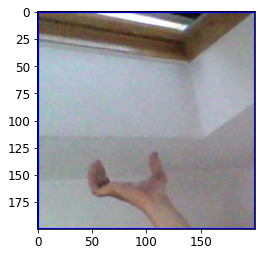

GroundTruth:  space


In [21]:
dataiter = iter(test_dataloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % sign_classes[labels[j].item()] for j in range(1)))

In [22]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % sign_classes[predicted[j].item()] for j in range(1)))

Predicted:  space


In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 1450 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 1450 test images: 93 %


In [24]:
class_correct = list(0. for i in range(29))
class_total = list(0. for i in range(29))
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data; 
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        label = labels[0]
        class_correct[label] += c.item()
        class_total[label] += 1

for i in range(29):
    print('Accuracy of %5s : %2d %%' % (sign_classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     A : 92 %
Accuracy of     B : 97 %
Accuracy of     C : 97 %
Accuracy of     D : 96 %
Accuracy of     E : 89 %
Accuracy of     F : 96 %
Accuracy of     G : 89 %
Accuracy of     H : 97 %
Accuracy of     I : 93 %
Accuracy of     J : 97 %
Accuracy of     K : 89 %
Accuracy of     L : 100 %
Accuracy of     M : 88 %
Accuracy of     N : 97 %
Accuracy of     0 : 88 %
Accuracy of     P : 94 %
Accuracy of     Q : 96 %
Accuracy of     R : 83 %
Accuracy of     S : 80 %
Accuracy of     T : 98 %
Accuracy of     U : 90 %
Accuracy of     V : 93 %
Accuracy of     W : 95 %
Accuracy of     X : 92 %
Accuracy of     Y : 87 %
Accuracy of     Z : 100 %
Accuracy of   del : 96 %
Accuracy of nothing : 100 %
Accuracy of space : 94 %
